- Alessandro Breccia - 2076713

- Filippo Pra Floriani - 2089902

- Alessio Saccomani - 2090565

# Project_06 - Advanced Statistics for Physics Analysis
# Bayesian Network

### Paper summary

In the paper https://link.springer.com/article/10.1007/bf00994110 , researchers implement a Bayesian method for constructing a probabilistic network from
a database of records, which we call cases.

Such a network can provide insight into probabilistic dependencies that exist among the variables in the database:
- searches for a probabilistic-network structure that has a high posterior probability given the database, and outputs the structure and its probability.
- hypothesis testing: given hypothetical structure of the dependency relationships and returns probability of structure given a database of cases.


A Bayesian belief-network *structure* $B_S$ is a directed acyclic graph in which nodes represent domain variables and arcs between nodes represent probabilistic dependencies.

This structure is augmented by conditional probabilities $B_P$ to form a Bayesian belief network $B = (B_S, B_P)$.

For each node, there is a conditional probability that relates this node to its predecessors (parents): $\pi_i$ is parent node of variable $x_i$. If there are no parents, a Prior probability $P(x_i)$ is specified.

The joint probability of any particular instantiation (structure) of all $n$ variables in a belief network can be calculated as follows:
$$P(X_1, ..., X_n) = \prod^n_{i=1} P(X_i|\pi_i)$$

Given two Bayesian belief network structure $B_{S1}, B_{S2}$, we can compute the relative probabilities of different belief-network structures, given a database of cases and a set of explicit assumptions:

- given database D and Z the set of variables represented by D we can calculate the ratio of posteriors: 

$$\frac{P(B_{S1}|D)}{P(B_{S2}|D)} = \frac{\frac{P(B_{S1}|D)}{P(D)}}{\frac{P(B_{S2}|D)}{P(D)}} = \frac{P(B_{S1},D)}{P(B_{S2},D)}$$


For computing $P(B_{S1},D)$:

$B_S$ is the belief network structure

$D$ database

$Z$ variables values of database

$B_p$ conditional-probability assignments associated with belief-network structure

Assumptions:

- discrete variables
$$P(B_S, D) = \int_{B_p}P(D|B_S, B_p)f(B_p|B_S)P(B_S)dB_p$$

where $P(D|B_S, B_p)$ denotes the probability mass function (rather than the density function) and $f(B_p|B_S)$ denotes the conditional-probability density function over $B_p$ given $B_S$

- cases occur independently, given a belief-network model
$$P(B_S, D) = \int_{B_p} \prod^m_{h=1} \left [ P(C_h|B_S, B_p) \right ] f(B_p|B_S)P(B_S)dB_p$$

where *m* is the numbers of cases in $D$ and $C_h$ is the *h-th* case in $D$.

- there are no cases that have variables with missing values

- the density function $f(B_p|B_s)$ is uniform


### Computation problem

These requirements result in the following `Theorem`:

- $Z$ set of *n* discrete variables, where $x_i$ in $Z$ has $r_i$ possible value assignments $(\nu_{i1}, ..., \nu_{ir_i})$

- $D$ database of *m* cases, where each case contains a value assignment for each variable in $Z$

- $B_S$ belief-network structure containing just $Z$ variables, each $x_i$ in $B_S$ has a set of parents $\pi_i$

- $\omega_{ij}$ unique istantiation of $\pi_i$ relative to $D$, where $q_i$ are the number of unique instatiations of $\pi_i$

Define $\alpha_{ijk}$ as the number of cases in $D$ in which variable $x_i$ has the value $\nu_{ik}$ and $\pi_i$ is instantiated as $\omega_{ij}$:

$$ N_{ij} = \sum^{r_i}_{k = 1} \alpha_{ijk} $$

so we have that
$$ P(B_S, D) = P(B_S) \prod^n_{i=1} \prod^{q_i}_{j=1} \frac{(r_i - 1)!}{(N_{ij}  + r_i - 1)!}\prod^{r_i}_{k=1} \alpha_{ijk}! $$


We would like to find the best structure between all the possible ones. We can achieve this by maximizing this equation for every possible $B_S$.

Anyway, as a function of the number of nodes, the number of possible structures grows exponentially. Thus, an exhaustive enumeration of all network structures is not feasible in most domains.

We need a method for locating the $B_S$ that maximizes $P(B, D)$.

Let's first generalize this equation:

assume $\pi^S_i$ to be the parents of $x_i$ in  $B_S$, denoted as $\pi^S_i \rightarrow x_i$ and assume $P(B_S) = \prod_{1 \leq i \leq n} P(\pi^S_i \rightarrow x_i)$. Thus, for all distinct pairs of variables $x_i$ and $x_j$, our belief about $x_i$ having some set of parents is independent of our belief about $x_j$ having some set of parents.

We get:

$$ P(B_S, D) = \prod^n_{i=1} P(\pi^S_i \rightarrow x_i) \prod^{q_i}_{j=1} \frac{(r_i - 1)!}{(N_{ij}  + r_i - 1)!}\prod^{r_i}_{k=1} \alpha_{ijk}! $$


As we said, we would like to maximize this equation, but the computation deals with too much possible structures.
We have to put some constraints and make the determination of the most likely belief-network structure computationally feasible:
1. ordering on the nodes (if $x_i$ precedes $x_j$, not allowed structures with arc from $x_j$ to $x_i$)
2. sufficiently tight limit on the number of parents of any node
3. $P(\pi_i \rightarrow x_i)$ and $P(\pi_j \rightarrow x_j)$ are marginally independent when $i \neq j$, and we can compute such prior probabilities efficiently.

We end up with:

$$
\max_{B_S}[P(B_S, D)] = \prod^n_{i=1} \left [ P(\pi_i \rightarrow x_i) \prod^{q_i}_{j=1} \frac{(r_i - 1)!}{(N_{ij} + r_i - 1)!} \prod^{r_i}_{k=1} \alpha_{ijk}! \right ] 
$$


Unfortunately, the second assumption may be particularly difficult to justify in practice. For this reason, we implement a heuristic algorithm that requires no restriction on the number of parents of a node, although it does permit it.


### K2 algorithm

`Heuristic algorithm in polynomial-time`

Requirements:

- ordering of nodes
- equal priors to  $B_S$
- upper limit on the number of parents

We begin by making the assumption that a node has no parents, and then we add incrementally the parent whose addition increases the most the probability of the resulting structure.

When the addition of no single parent can increase the probability, we stop adding parents to the node.
We use the following function:

$$ g(i, \pi_i) = \prod^{q_i}_{j=1} \frac{(r_i - 1)!}{(N_{ij}  + r_i - 1)!}\prod^{r_i}_{k=1} \alpha_{ijk}! $$

where $\alpha_{ijk}$ are computated relative to $\pi_i$ being parents of $x_i$ and to database $D$.

`Pseudo - Code`:

 **procedure** K2;
1. {Input: A set of *n* nodes, an ordering on the nodes, an upper bound *u* 
2. $\quad$ on the number of parents a node may have, and a database $D$ containing *m* cases. }
3. {Output: For each node, a printout of the parents of the node.}
4. **for** i := 1 **to** n **do**
5. $\quad$ $\pi_i$ := $\emptyset$;
6. $\quad$ $P_{old}$ := $g(i, \pi_i)$
7. $\quad$ OKToProceed := **true**
8. $\quad$ **while** OKToProceed **and** $|\pi_i| < u$ **do**
9. $\qquad$ let z be the node in $Pred(x_i) - \pi_i$ that maximizes $g(i, \pi_i \cup {z})$
10. $\qquad$ $P_{new}$ := $g(i, \pi_i \cup {z})$
11.  $\qquad$ **if** $P_{new} < P_{old}$ **then**
12. $\qquad$ $\quad$ $P_{old}$ := $P_{new}$
13. $\qquad$ $\quad$ $\pi_i$ := $\pi_i \cup {z}$
14. $\qquad$ **else** OKToProceed := **false**
15. $\quad$ **end** {while}
16. $\quad$ **write**('Node:', $x_i$, 'Parents of this node:, $\pi_i$)
17. **end** {for}
18. **end** {K2}


### Part 1

We implement the **K2 algorithm** previously introduced.

First of all we choose an ordering of the nodes, which will be crucial in the determination of the best structure. Although an algorithm should be the best choice for this task, the computation is not feasible (even with 8 nodes), so we consider as first combination an order based on our prior knowledge.

Then we follow the psedo-code.

In order to be faster and improve the run-time speed of K2, we replace the functions $g(i, \pi_i)$ and $g(i, \pi_i \cup {z})$ by the logarithmic versions $log(g(i, \pi_i))$ and $log(g(i, \pi_i \cup {z}))$, respectively. In this way, only addition and subtraction, rather than multiplication and division, are required.

In [1]:
# Import packages
suppressWarnings({
suppressPackageStartupMessages({
    
library('tidyverse')
library('dplyr')
library('bnlearn')
library('Rgraphviz')
library('gmp')
library('progress')
library('bnstruct')
library('IRdisplay')    
library('infotheo')
    
})
})

\begin{matrix}
\text{Databases} & \text{Switch} \\
\hline
\text{RUIZ} & 0 \\
\text{ASIA} & 1 \\
\text{CHILD} & 2 \\
\text{ALARM} & 3 \\
\text{ASIA + CHILD} & 4 \\
\end{matrix}

In [2]:
# Select database
switch <- 1

if (switch == 0){
    
    # Create the data
    data <- matrix(c(
      1, 1, 0, 0,
      2, 1, 1, 1,
      3, 0, 0, 1,
      4, 1, 1, 1,
      5, 0, 0, 0,
      6, 0, 1, 1,
      7, 1, 1, 1,
      8, 0, 0, 0,
      9, 1, 1, 1,
      10, 0, 0, 0
    ), ncol = 4, byrow = TRUE)

    # Create the dataframe
    df <- as.data.frame(data)
    colnames(df) <- c("case", "x1", "x2", "x3")
    
    df <- subset(df, select = -case)
    nodes <- colnames(df)
    
    upper_limit <- length(df)
    df.name <- 'RUIZ'

} else if (switch == 1){
    
    df <- read.csv('https://www.ccd.pitt.edu/wiki/images/ASIA10k.csv')
    df <- df |> select(asia, tub, smoke, lung, either, bronc, dysp, xray)
    nodes <- colnames(df)
    
    upper_limit <- length(df)
    df.name <- 'ASIA'
    
} else if (switch == 2){
    
    df <- read.csv('https://www.ccd.pitt.edu/wiki/images/CHILD10k.csv')
    df <- df |> select(BirthAsphyxia, Disease, Sick, DuctFlow, CardiacMixing, LungParench, 
                       LungFlow, LVH, Age, Grunting, HypDistrib, HypoxiaInO2, CO2, ChestXray, 
                       LVHreport, GruntingReport, LowerBodyO2, RUQO2, CO2Report, XrayReport)
    nodes <- colnames(df)
    
    upper_limit <- 3
    df.name <- 'CHILD_data'

    
} else if (switch == 3) {
    
    df <- read.csv('https://www.ccd.pitt.edu/wiki/images/ALARM10k.csv')
    df <- df |> select(MINVOLSET, VENTMACH, DISCONNECT, PULMEMBOLUS, INTUBATION, KINKEDTUBE, PAP, 
                       SHUNT, PRESS, VENTLUNG, FIO2, MINVOL, VENTALV, ANAPHYLAXIS, PVSAT, ARTCO2, 
                       TPR, INSUFFANESTH, SAO2, EXPCO2, CATECHOL, LVFAILURE, HYPOVOLEMIA, HISTORY, 
                       LVEDVOLUME, STROKEVOLUME, ERRLOWOUTPUT, HR, ERRCAUTER, PCWP, CVP, CO, HRBP, HRSAT, HREKG, BP)
    nodes <- colnames(df)
    df <- df[1:10000,]
    
    upper_limit <- 3
    df.name <- 'ALARM'

} else if (switch == 4){
    
    df1 <- read.csv('https://www.ccd.pitt.edu/wiki/images/ASIA10k.csv')
    df2 <- read.csv('https://www.ccd.pitt.edu/wiki/images/CHILD10k.csv')

    df1$RowNum <- seq_len(nrow(df1))
    df2$RowNum <- seq_len(nrow(df2))

    merged_df <- merge(df1, df2, by = "RowNum")
    df <- merged_df[, -1]
    
    df <- df |> select(asia, tub, smoke, lung, either, bronc, dysp, xray, BirthAsphyxia, Disease, 
                       Sick, DuctFlow, CardiacMixing, LungParench, LungFlow, LVH, Age, Grunting, 
                       HypDistrib, HypoxiaInO2, CO2, ChestXray, LVHreport, GruntingReport, LowerBodyO2, 
                       RUQO2, CO2Report, XrayReport)
    nodes <- colnames(df)
    
    upper_limit <- 3
    df.name <- 'ASIA_CHILD'

} else {
    
    cat('Select a database')
    break
}

In [3]:
# Define a function to evalaute factorial
f <- function(x){
    sum(log(seq(x)))
}

#### K2 algorithm

In [4]:
k2 <- function(dataframe, columns_ordering, indicators){
    
    # Define columns ordering
    df <- dataframe
    df <- df[columns_ordering]
    
    # Define variables
    res <- data.frame(character(),numeric(), stringsAsFactors = FALSE)
    nodes <- colnames(df)
    comb_tot <- c()

    # Create a progress bar object
    pb <- txtProgressBar(min = 0, max = length(df), style = 3, width = 50, char = "=")

    # Start algorithm
    for (node_num in seq_along(nodes)) {

        # Select node name
        node <- nodes[node_num]

        # Define model parameter
        v <- df[, node]
        r <- nrow(as.data.frame(unique(v)))
        n <- length(df[1, ]) - 1
        selected <- node
        selected_index <- which(names(df) == selected)

        # Define parents
        parents <- colnames(df[1:(selected_index - 1)])

        # Compute combinations of parents-sons putting an upper limit on the number of parents per node
        num_parents <- ifelse((length(parents) > upper_limit), upper_limit, length(parents))
        combinations <- c(node)
        for (j in 1:num_parents) {
          combinations <- c(combinations, combn(parents, j, simplify = FALSE))
        }
        combinations <- unique(combinations)
        comb_tot <- c(comb_tot, combinations)


        # Compute conditional probabilities
        for (k in 1:length(combinations)){  

            # Find the rows combinations and their frequencies
            data <- df[c(combinations[[k]], node)]
            data_freq <- as.data.frame(table(comb = do.call(paste, data)))

            # Calculate alpha
            alpha <- data_freq[, 2]
            comb <- data_freq[, 1]

            # Calculate N, excluding the node selected column
            data_freq_ <- as.data.frame(table(comb = do.call(paste, as.data.frame(data[, -ncol(data)]))))
            N <- data_freq_[, ncol(data_freq_)]

            if (k==1){
                N <- sum(N)
            } else{
                N <- data_freq_[, ncol(data_freq_)]
            }

            # Calculate the conditional probabilities
            val1 <- sum(Vectorize(f)(r-1))
            val2 <- sum(Vectorize(f)(N+r-1))
            val3 <- sum(Vectorize(f)(alpha))
            value <- val1+val3-val2
            #value <- exp(value)
            

            # Save results
            new_row <- data.frame(node,value)
            res <- rbind(res, new_row)

        }

        setTxtProgressBar(pb, node_num)
    }

    # Define res dataframe with parents combinations
    comb_column <- sapply(comb_tot, function(x) paste(x, collapse = ","))
    res$combination <- comb_column


    # Find best results   
    best_res <- res %>%
      group_by(node) %>%
      summarize(max_value = max(value), combination = combination[which.max(value)])
               
    # Print best results
    if (indicators){
        
    } else{
        cat('\n')
        cat('\n')
        print(best_res)
    }


    # Define graph by creating the string of parents-child connections               
    node_label <- ''
    for (j in 1:length(nodes)){
        node_label <- paste0(node_label,"[", best_res$node[j])
        if (best_res$node[j] == best_res$combination[j]){
            node_label <- paste0(node_label,"]")
        }else{
            if (length(strsplit(best_res$combination[j], ",")[[1]])>1){
                    node_label <- paste0(node_label,"|", paste(strsplit(best_res$combination[j], ",")[[1]], collapse = ":"),"]")
            }else{
                node_label <- paste0(node_label,"|", best_res$combination[j], "]")
            }
        }
    }

    node_label
    g <- model2network(node_label)
    #graphviz.plot(g, layout='dot')

    # Saving graphs and plot as png
    if (indicators){
        
        output_path <- paste0('indicator_images/network_', df.name, '_', method, '.png')

        png(file = output_path, width = 1800, height = 1000)
        p <- bnlearn::as.graphNEL(g) # use this to avoid printing of graphviz.plot
        par(cex=1)
        plot(p,  attrs=list(node = list(fillcolor = "cyan", fontsize=50)))
        dev.off()

    } else{
        
        output_path <- paste0('algorithm_images/network_', df.name, '.png')

        png(file = output_path, width = 1800, height = 1000)
        p <- bnlearn::as.graphNEL(g) # use this to avoid printing of graphviz.plot
        par(cex=1)
        plot(p,  attrs=list(node = list(fillcolor = "cyan", fontsize=50)))
        dev.off()                     

        image_path <- paste0('algorithm_images/network_', df.name, '.png')
        display_png(file = image_path)
        
    }
                          
    if (switch != 0 & switch != 4 & indicators == FALSE){
        image_path <- paste0('true_images/true_', df.name, '.png')
        display_png(file = image_path)
    }

    close(pb)
                          
    return (list(res, best_res))

}

  |==================================================| 100%

# A tibble: 8 × 3
  node   max_value combination 
  <chr>      <dbl> <chr>       
1 asia      -529.  asia        
2 bronc    -6420.  smoke       
3 dysp     -3931.  either,bronc
4 either     -21.9 tub,lung    
5 lung     -1890.  smoke       
6 smoke    -6935.  smoke       
7 tub       -575.  tub         
8 xray     -1968.  either      


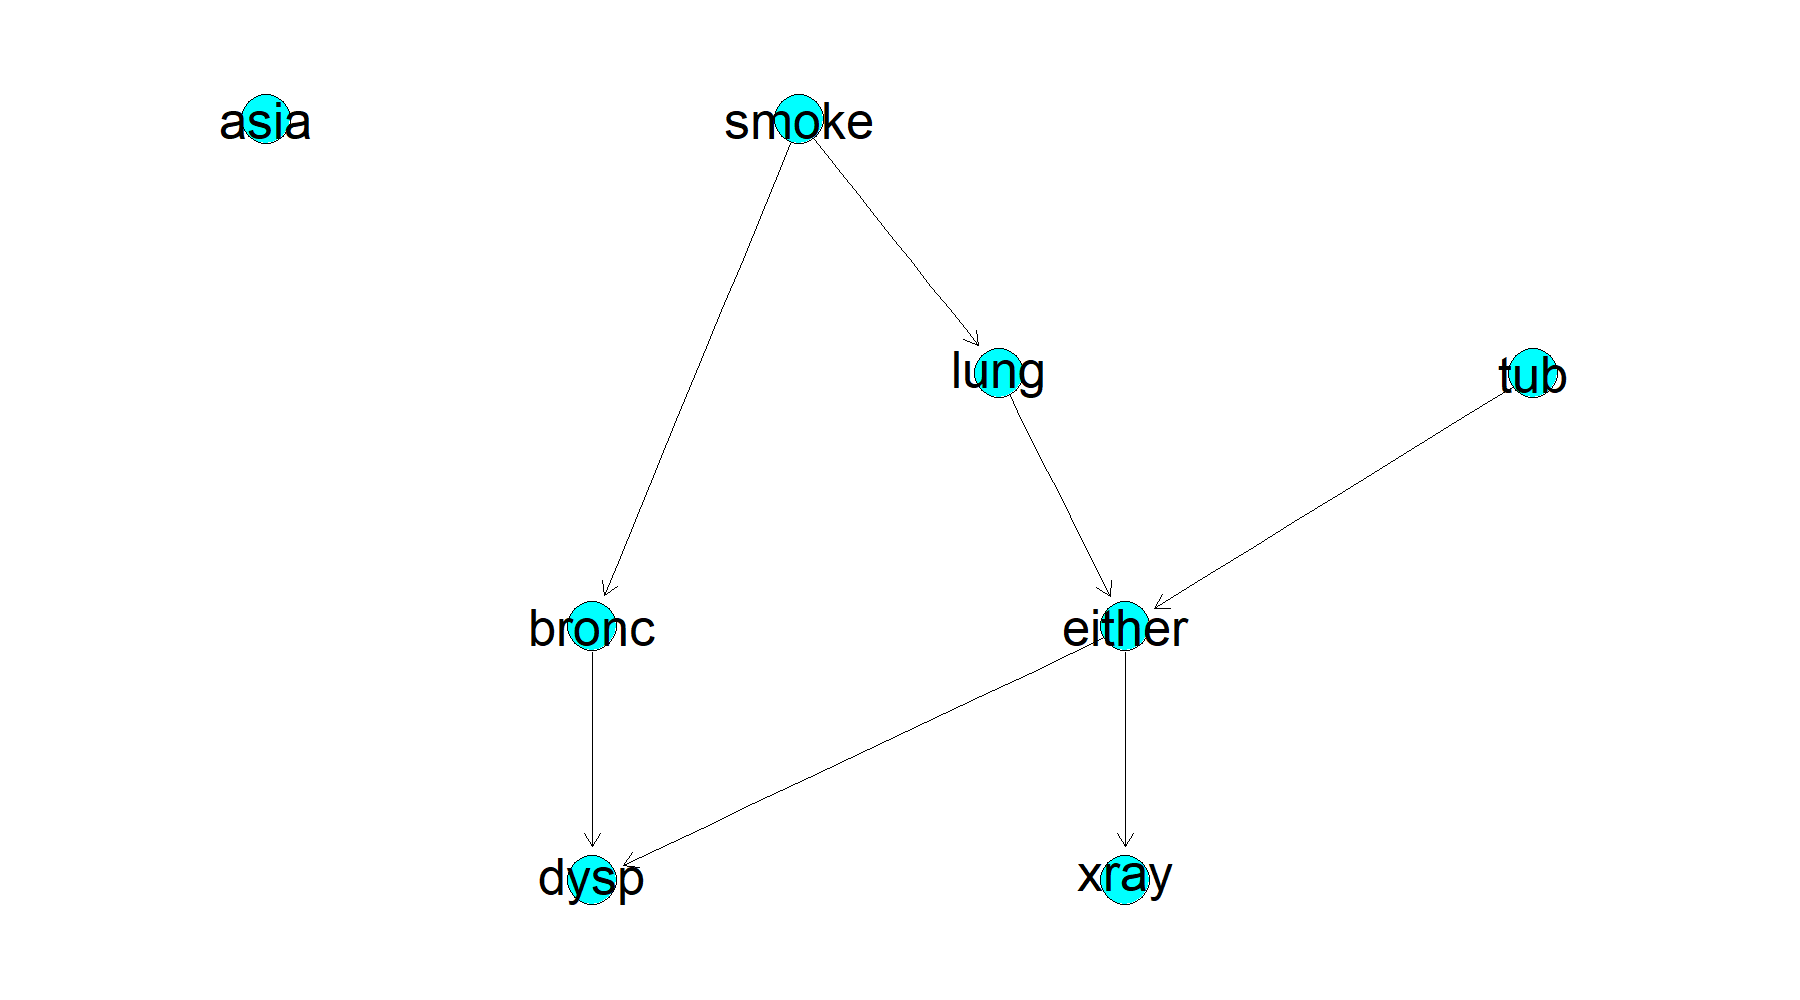

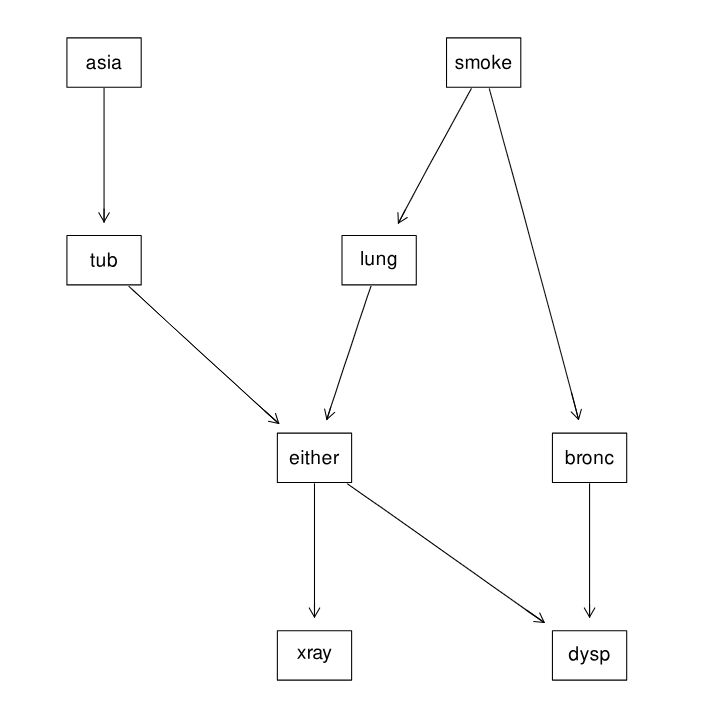

In [5]:
output_k2 <- k2(df, nodes, indicators=FALSE)
res <- output_k2[[1]]
best_res <- output_k2[[2]]

### Comparison with the structure taking the second best probability for each node

,node,max_2value,combination
,<chr>,<dbl>,<chr>
1,asia,-528.95658,asia
2,bronc,-6422.69399,"tub,smoke"
2.1,dysp,-3934.45309,"lung,either,bronc"
3,either,-29.33373,"asia,tub,lung"
4,lung,-1895.19720,"asia,smoke"
5,smoke,-6937.32296,asia
6,tub,-575.26404,asia
7,xray,-1971.63097,"lung,either"


[1] "[asia][bronc|tub:smoke][dysp|lung:either:bronc][either|asia:tub:lung][lung|asia:smoke][smoke|asia][tub|asia][xray|lung:either]"

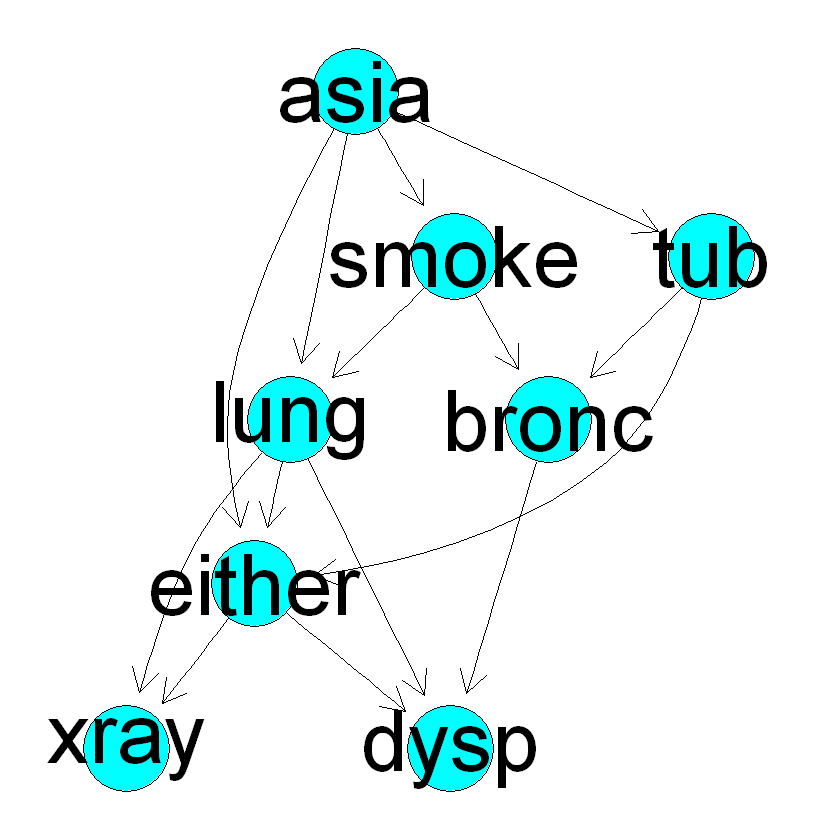

In [6]:
# Find second best probability for each node   

res_ <- res %>% select(node,value,combination) %>% group_by(node) %>% filter(value < max(value))  #exclude max values
best_2res_ <- res_ %>% group_by(node) %>% summarize(max_2value = max(value), combination = combination[which.max(value)])  #find 2 max values

node <- 0
max_2value <- 0
combination <- 0
best_2res <- data.frame(node,max_2value,combination)
best_2res[1,] <- res[1,]
best_2res[2:length(nodes),] <- best_2res_[1:nrow(best_2res_),]

best_2res


# Define graph by creating the string of parents-child connections                
node_label <- ''
for (j in 1:length(nodes)){
    node_label <- paste0(node_label,"[", best_2res$node[j])
    if (best_2res$node[j] == best_2res$combination[j]){
        node_label <- paste0(node_label,"]")
    }else{
        if (length(strsplit(best_2res$combination[j], ",")[[1]])>1){
                node_label <- paste0(node_label,"|", paste(strsplit(best_2res$combination[j], ",")[[1]], collapse = ":"),"]")
        }else{
            node_label <- paste0(node_label,"|", best_2res$combination[j], "]")
        }
    }
}

# Plot graph
node_label
g <- model2network(node_label)
p <- bnlearn::as.graphNEL(g) # use this to avoid printing of graphviz.plot
par(cex=1)
if (switch == 0){
    plot(p,  attrs=list(node = list(fillcolor = "cyan", fontsize=5)))
} else if (switch == 3){
    plot(p,  attrs=list(node = list(fillcolor = "cyan", fontsize=42)))
} else{
    plot(p,  attrs=list(node = list(fillcolor = "cyan", fontsize=50)))
}

In [7]:
cat('The best structure is more likely than the second best structure of a factor: ', exp(sum(best_res$max_value) - sum(best_2res$max_2value)))
cat('\nDifference between the log of the best structure and log of the worst structure is: ', sum(best_res$max_value) - sum(best_2res$max_2value))

The best structure is more likely than the second best structure of a factor:  27496254870
Difference between the log of the best structure and log of the worst structure is:  24.03732

###  Comparison with the second best structure

node,max_value,combination
<chr>,<dbl>,<chr>
asia,-528.95658,asia
bronc,-6420.05737,smoke
dysp,-3931.11496,"either,bronc"
either,-21.94054,"tub,lung"
lung,-1889.71129,smoke
smoke,-6935.42810,smoke
tub,-575.26404,asia
xray,-1968.43757,either


[1] "[asia][bronc|smoke][dysp|either:bronc][either|tub:lung][lung|smoke][smoke][tub|asia][xray|either]"

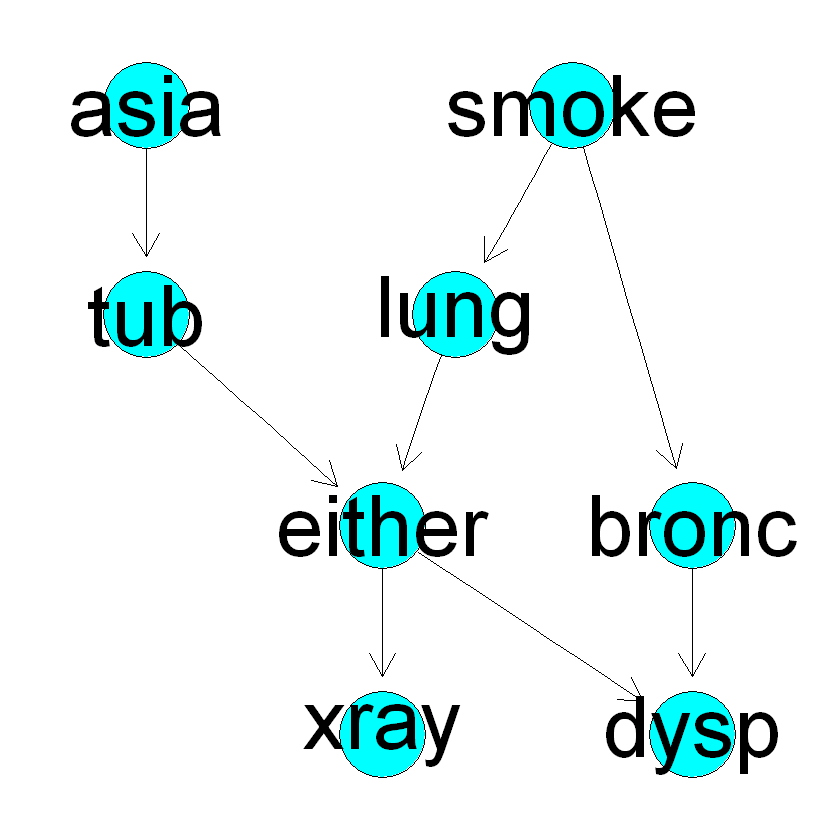

In [8]:
index_min <- which.min((best_res[-1,2] - best_2res[-1,2])[[1]])+1

second_best <- best_res
second_best[index_min,] <- best_2res[index_min,]

second_best

# Define graph by creating the string of parents-child connections                
node_label <- ''
for (j in 1:length(nodes)){
    node_label <- paste0(node_label,"[", second_best$node[j])
    if (second_best$node[j] == second_best$combination[j]){
        node_label <- paste0(node_label,"]")
    }else{
        if (length(strsplit(second_best$combination[j], ",")[[1]])>1){
                node_label <- paste0(node_label,"|", paste(strsplit(second_best$combination[j], ",")[[1]], collapse = ":"),"]")
        }else{
            node_label <- paste0(node_label,"|", second_best$combination[j], "]")
        }
    }
}

# Plot graph
node_label
g <- model2network(node_label)
p <- bnlearn::as.graphNEL(g) # use this to avoid printing of graphviz.plot
par(cex=1)
if (switch == 0){
    plot(p,  attrs=list(node = list(fillcolor = "cyan", fontsize=5)))
} else if (switch == 3){
    plot(p,  attrs=list(node = list(fillcolor = "cyan", fontsize=42)))
} else{
    plot(p,  attrs=list(node = list(fillcolor = "cyan", fontsize=50)))
}

In [9]:
cat('The best structure is more likely than the second best structure of a factor: ', exp(sum(best_res$max_value) - sum(second_best$max_value)))
cat('\nDifference between the log of the best structure and log of the worst structure is: ', sum(best_res$max_value) - sum(second_best$max_value))

The best structure is more likely than the second best structure of a factor:  1.099883
Difference between the log of the best structure and log of the worst structure is:  0.095204

We cannot compute the ratio of the posterior probability between the best and the **worst** structure due to precision issues, the computation required to evaluate the exponential of such a difference of logarithm is not feasible.

### Methods to order the nodes before the K2 algorithm

In the paper https://onlinelibrary.wiley.com/doi/epdf/10.1111/coin.12182?saml_referrer#biblinkcounter.41, there are some methods used to try to order the nodes before implementing the K2 algorithm. In this case we have implemented the calculation of the entropy, the conditional entropy and the mutual information from the *infotheo* package.

Shannon entropy for a series of discrete random values is $$H(X) = -\sum_{x \in X}p(x)\log(p(x)) $$ easily translated if we have more than one variable as $$H(X,Y) = -\sum_{x \in X}\sum_{y \in Y} p(x,y)\log(p(x,y)) $$ From this we can define the conditional entropy for two variables $X$ and $Y$ as $$ H(Y|X) = H(X,Y)-H(X) = -\sum_{x \in X}\sum_{y \in Y} p(x,y)\log(\frac{p(x,y)}{p(x)}) $$
where $p(x,y)$ is the joint probability and $p(x)$, $p(y)$ are the marginal probability of variables $x$ and $y$ respectively. From this the Mutual Information $MI$ can be computed as $$ MI(X,Y) = H(X)+H(Y)-H(X,Y) = -\sum_{x \in X}\sum_{y \in Y} p(x,y)\log(\frac{p(x,y)}{p(x)\cdot p(y)})$$ like in probability rules. The $MI$ between two random variables is a measure to assign the joint linear and non linear dependencies. When the $MI$ is equal to zero, it means that two variables X and Y are independent.



#### ENTROPY:

We apply the entropy measure to select the suitable sequential node ordering. Entropy is a measure of uncertainty and disorder. 
Points are ordered from beginning to end, from the lowest entropy to the highest one. For example the sequential ordering is $O=(A,B,D,C)$ if $H(A)<H(B)<H(D)<H(C)$.

#### MUTUAL INFORMATION:

The $MI$ can be considered as the reduction in uncertainty about one random variable given knowledge of another, it explains how much one random variable tells about another one. The $MI$ is a measure of the mutual dependence between the two random variables. The high value of the $MI$ denotes a large reduction in uncertainty, low $MI$ indicates a small reduction, and when the $MI$ is equal to zero, it means that two random variables are independent.  In order to select the suitable sequential node ordering based on $MI$ values, first, the entropy values among nodes are calculated. Then, the sequential node ordering is selected according to these values. Suppose that the starting point is $A$ (less entropic node), then node $B$ is selected since $MI(A,B)$ has maximum value in comparison with $MI(A,C)$.

#### CONDITIONAL ENTROPY:

The amount of information required to depict the result of a random variable given that the value of another random variable is known can be measured by the conditional entropy. 
We start from the less entropic node and then calculate the minimum conditional entropy of the nodes with respect to the already selected ones.

\begin{matrix}
\text{Databases} & \text{Switch} \\
\hline
\text{ASIA} & 0 \\
\text{CHILD} & 1 \\
\text{ASIA + CHILD} & 2 \\
\end{matrix}

In [10]:
swi = 0

if (swi == 0){    
    df_int <- read.csv('ASIA10k.csv')
    
    df.name <- 'ASIA'
    upper_limit <- length(df_int)

} else if (swi == 1){
    df_int <- read.csv('CHILD10k.csv')
    
    df.name <- 'CHILD'
    upper_limit <- 3

} else if (swi == 2){
    
    df1 <- read.csv('ASIA10k.csv')
    df2 <- read.csv('CHILD10k.csv')
    
    df1$RowNum <- seq_len(nrow(df1))
    df2$RowNum <- seq_len(nrow(df2))

    merged_df <- merge(df1, df2, by = "RowNum")
    merged_df <- merged_df[, -1]
    
    df_int <- merged_df |> select(asia, tub, smoke, lung, either, bronc, dysp, xray, BirthAsphyxia, Disease, 
                       Sick, DuctFlow, CardiacMixing, LungParench, LungFlow, LVH, Age, Grunting, 
                       HypDistrib, HypoxiaInO2, CO2, ChestXray, LVHreport, GruntingReport, LowerBodyO2, 
                       RUQO2, CO2Report, XrayReport)    
    df.name <- 'ASIA_CHILD'
    upper_limit <- 3
    
} else{
    
    cat('Select dataset')
    break
    
}



map_column <- function(column) {
  distinct_values <- unique(column)
  mapping_table <- tibble(
    string_value = distinct_values,
    numeric_value = seq_along(distinct_values)
  )
  mapped_column <- mapping_table$numeric_value[match(column, mapping_table$string_value)]
  return(mapped_column)
}




calculate_sequential_ordering <- function(df, method) {
    
  if (method == 'Conditional_Entropy'){
      
  # Calculate the entropy for each node
      
  entropy_values <- sapply(colnames(df), function(node) {
    condentropy(df[node])
  })
  
  # Select the starting point with the minimum entropy
      
  starting_point <- colnames(df)[which.min(entropy_values)]
  
  # Initialize the sequential ordering
      
  sequential_ordering <- c(starting_point)
  
  #conditional entropy for each  node
      
  remaining_nodes <- setdiff(colnames(df), starting_point)
  while (length(remaining_nodes) > 0) {
  
      conditional_entropy_values <- sapply(remaining_nodes, function(node) {
      condentropy(df[sequential_ordering], df[node], method = 'emp')
    })
      
    next_node <- remaining_nodes[which.min(conditional_entropy_values)]
    sequential_ordering <- c(sequential_ordering, next_node)
    remaining_nodes <- setdiff(remaining_nodes, next_node)
  }
  }
  if (method == 'Entropy'){
      
      #Calculate entropy and sort names by entropy values
      entropy_values <- sapply(colnames(df), function(node) {
    condentropy(df[[node]])
           })
    sequential_ordering <- names(sort(entropy_values))
 
      
      
      
  }
      
   
if (method == 'Mutual_Information'){
       
    entropy_values <- sapply(colnames(df), function(node) {
    condentropy(df[[node]])
  })
  
  starting_point <- colnames(df)[which.min(entropy_values)]
  
  sequential_ordering <- c(starting_point)
  
  # mutual information for each  node
  remaining_nodes <- setdiff(colnames(df), starting_point)
  while (length(remaining_nodes) > 0) {
      l <- length(sequential_ordering)
      if (l==1){
        conditional_MI_values <- sapply(remaining_nodes, function(node) {
        mutinformation(df[sequential_ordering], df[node], method = 'emp')
    })
      }
  
     else{ conditional_MI_values <- sapply(remaining_nodes, function(node) {
      mutinformation(df[sequential_ordering[l]], df[node], method = 'emp')
    })
     }
    next_node <- remaining_nodes[which.max(conditional_MI_values)]
    sequential_ordering <- c(sequential_ordering, next_node)
    remaining_nodes <- setdiff(remaining_nodes, next_node)
  }
       
       
   }   

    return(sequential_ordering)
}






METHOD <- c('Entropy', 'Conditional_Entropy', 'Mutual_Information')

#shuffle the order of the columns

a <- sample(seq_along(colnames(df_int)))
df_int <- df_int[a]

#map columns to numeric values

for (i in 1:ncol(df_int)) {
  df_int[, i] <- map_column(df_int[, i])
}




# Evaluate columns ordering

for (method in METHOD){
    result <- calculate_sequential_ordering(df_int, method)    
    k2(df_int, result, indicators=TRUE)
}



  |==================================================| 100%
  |==================================================| 100%
  |==================================================| 100%


Here we report the graphs for the best ordering method for Asia and Child using the K2 algorithm we implemented. We see that the relationship are okay but sometimes they are reversed due to ordering. The best ordering method seems to be The mutual information one: the links are the same but sometimes reversed like in the case of Asia Database where all connections are okay but the either-lung-smoke one is in the wrong parents-child relation.

<div>
        <img src="indicator_images/network_ASIA_Mutual_Information.png" alt="Network Image" style="width: 45%; display: inline-block; margin-right: 5px;">
    <img src="indicator_images/network_CHILD_Mutual_Information.png" alt="bnlearn Image" style="width: 54%; display: inline-block;">
    <img src="indicator_images/network_ASIA_CHILD_Mutual_Information.png" alt="bnlearn Image" style="width: 60%; display: inline-block;">
</div>


### Part 2

We now analyze the results and the performaces of the algorithms provided by the R library package 'bnstruct' over the previous cited datasets, to evaluate the differences and the affinity with the implemented K2 algorithm.

In [11]:
child <- read.csv('https://www.ccd.pitt.edu/wiki/images/CHILD10k.csv')
sachs <- read.csv('https://www.ccd.pitt.edu/wiki/images/SACHS10k.csv')
asia <- read.csv('https://www.ccd.pitt.edu/wiki/images/ASIA10k.csv')

# Map the string values to integers values
map_column <- function(column) {
  distinct_values <- unique(column)
  mapping_table <- tibble(
    string_value = distinct_values,
    numeric_value = seq_along(distinct_values)
  )
  mapped_column <- mapping_table$numeric_value[match(column, mapping_table$string_value)]
  return(mapped_column)
}

These datasets are contain string value, that will be mapped, per column, in numeric integers value, representing the previuos attributes.

The operation is fundamental for the next step of the analys and it is done through the funcion map_column() above.

The dataset now are ready to be mapped in a BNDataset, which is a bnstruct class able to manage datasets: it contains raw and imputed data, raw and imputed bootstrap samples, and variable names and cardinality.

There are 2 different ways to build a BNDataset:
- using two files containing respectively header informations and data.
- manually providing the data table and the related header informations.

Since we already have the datasets as tibble, we opted for the second way.

The BNDataset() function's key arguments are: 
* The data in a tibble or data frame layout.
* The names of each variables, which correspond to the nodes.
* The discreteness of each node, which in our cases is always TRUE for each node.
* The node sizes.

Could also be added a so called layering, which consists in a vector identifying the belonging layer of each node. It is fundamental in the case the user want to introduce a pre-defined structure to infere from the connections (arcs). This is the equivalent of imposing a prior upon the dataset variables, defining the set of possible parents and children of each node. We will see that it has a deep importance in the final result.

#### Ruiz

In [12]:
x1 <- c(1 ,1 ,0 ,1 ,0 ,0 ,1 ,0 ,1 ,0)
x2 <- c(0 ,1 ,0 ,1 ,0 ,1 ,1 ,0 ,1 ,0)
x3 <- c(0 ,1 ,1 ,1 ,0 ,1 ,1 ,0 ,1 ,0)
ruiz <- tibble(x3,x2,x1)
ruiz <- ruiz +1
df.name <- 'RUIZ'

dataset <- BNDataset(data = ruiz, variables = names(ruiz), discreteness = rep(TRUE,length(names(ruiz))),
                     node.sizes = matrix(apply(ruiz, 2, function(x) length(unique(x))))[,1] )

bnstruct :: learning the structure using MMHC ...

bnstruct :: learning using MMHC completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.




Bayesian Network: BNDataset

num.nodes 3

variables
x3 x2 x1
discreteness
TRUE TRUE TRUE
node.sizes
2 2 2
Adjacency matrix:
   x3 x2 x1
x3  0  0  0
x2  1  0  0
x1  0  1  0

Conditional probability tables:$x3
   x3
x2           1         2
  1 0.77272727 0.2272727
  2 0.04545455 0.9545455

$x2
   x2
x1          1         2
  1 0.7727273 0.2272727
  2 0.2272727 0.7727273

$x1
x1
  1   2 
0.5 0.5 




png 
  2

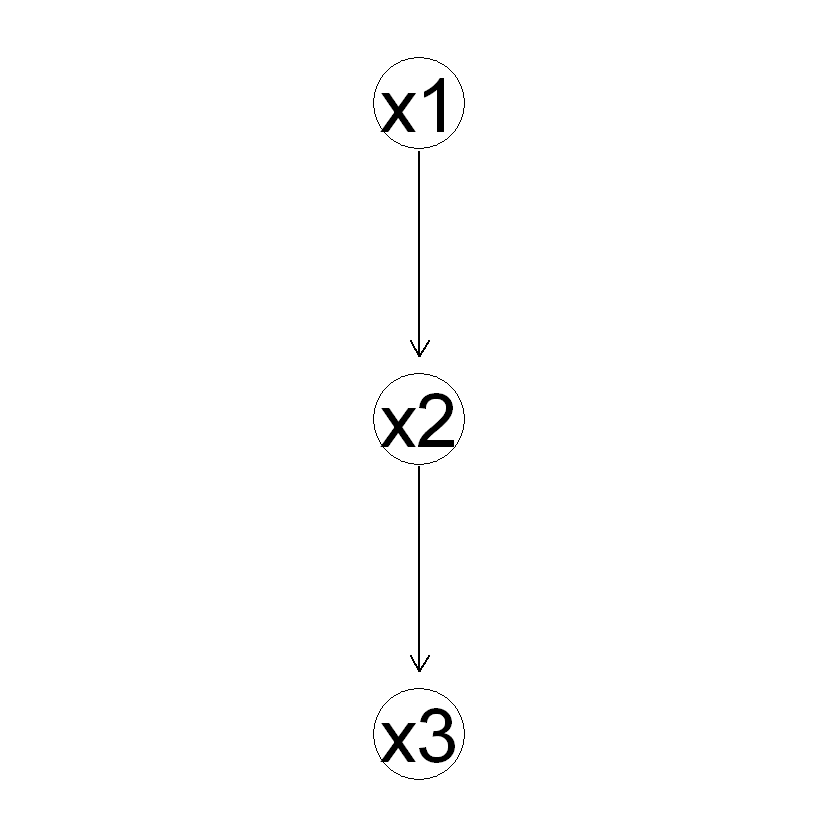

In [13]:
net <- learn.network(dataset)
print(net)
plot(net)

output_path <- paste0('bnlearn_images/bnlearn_', df.name, '.png')
png(file = output_path, width = 1800, height = 1000)
p <- plot(net, node.size.lab = 45)
par(cex=1)
dev.off()  

The network learned is the original one, matching the previous results obtained by the K2 algorithm.

#### Asia database

In [14]:
# Mapping string to integers, by columns
asia_num <- asia %>% mutate(across(everything(), ~ map_column(.)))
df.name <- 'ASIA'

dataset <- BNDataset(data=as.data.frame(asia_num), discreteness =  rep(TRUE, length(asia_num)), 
                     variables = colnames(asia_num), 
                     node.size = matrix(apply(asia_num, 2, function(x) length(unique(x))))[,1])


In this case the defaut algorithm *MMHC* ( *Maximum-Minimun Hill Climbing* ) is left aside and we opted for the *SM* (*Silander-Myllymaki*), which consists in: 

1. Calculate the local scores for all $n2^{n−1}$ different (variable, variable set)-pairs.

2. Using the local scores, find best parents for all $n2^{n−1}$ (variable, parent candidate set)-pairs.

3. Find the best sink for all $n2^{n}$ variable sets.

4. Using the results from Step 3, find a best ordering of the variables.

5. Find a best network using results computed in Steps 2 and 4.

The scoring function is the Bayesian Dirichlet equivalent uniform, provide one (out of many) statistical measurement of how well the DAG mirrors the dependence structure of the data.

bnstruct :: learning the structure using SM ...

bnstruct :: learning using SM completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.




Bayesian Network: BNDataset

num.nodes 8

variables
asia tub smoke lung bronc either xray dysp
discreteness
TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
node.sizes
2 2 2 2 2 2 2 2
Adjacency matrix:
       asia tub smoke lung bronc either xray dysp
asia      0   1     0    0     0      0    0    0
tub       0   0     0    0     0      1    0    0
smoke     0   0     0    1     1      0    0    0
lung      0   0     0    0     0      1    0    0
bronc     0   0     0    0     0      0    0    1
either    0   0     0    0     0      0    1    1
xray      0   0     0    0     0      0    0    0
dysp      0   0     0    0     0      0    0    0

Conditional probability tables:$asia
asia
          1           2 
0.990750925 0.009249075 

$tub
    tub
asia         1           2
   1 0.9900843 0.009915729
   2 0.9540541 0.045945946

$smoke
smoke
        1         2 
0.5045995 0.4954005 

$lung
     lung
smoke         1          2
    1 0.9892500 0.01075002
    2 0.9026642 0.09733576

$bronc
     b

png 
  2

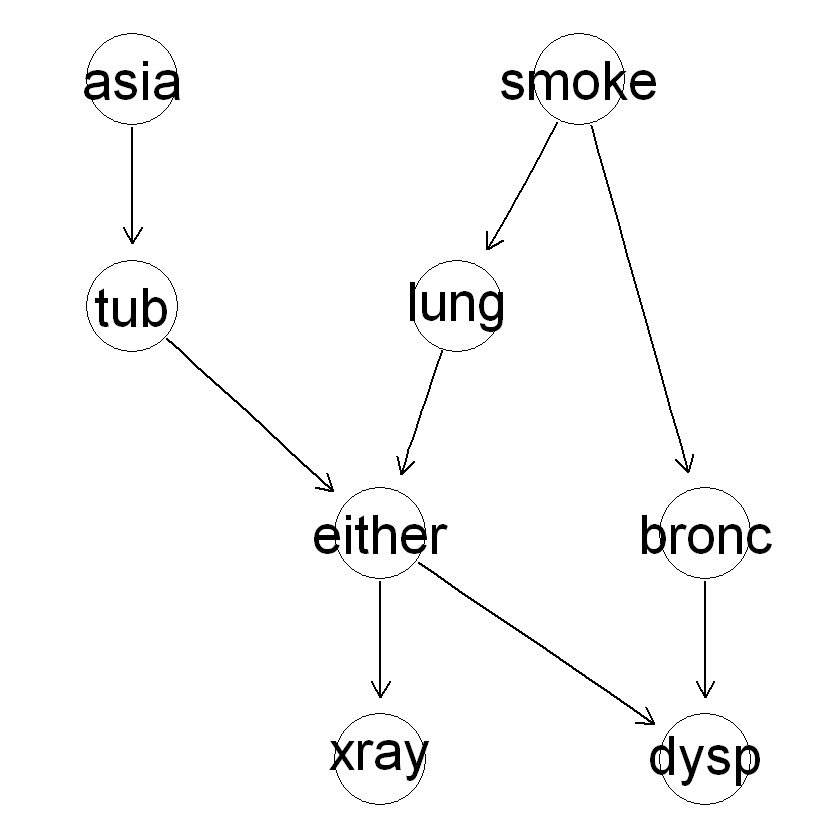

In [15]:
net <- learn.network(dataset, algo = "sm",
                      scoring.func = "BDeu",
                      struct.threshold = 10,
                      param.threshold = 0.001)

print(net)
plot(net, node.size.lab = 30)

#file_name <- paste0('bnlearn_', df.name, '.png')
#output_path <- paste0('bnlearn_images/', file_name)    #choose this ouput_path if creation of dir is needed
#dir.create(file.path('bnlearn_images'))

output_path <- paste0('bnlearn_images/bnlearn_', df.name, '.png')
png(file = output_path, width = 1800, height = 1000)
p <- plot(net, node.size.lab = 70)
par(cex=1)
dev.off()  

<div>
    <img src="bnlearn_images/bnlearn_ASIA.png" alt="Network Image" style="width: 59%; display: inline-block; margin-right: 5px;">
    <img src="true_images/true_ASIA.png" alt="bnlearn Image" style="width: 40%; display: inline-block;">
</div>


It reproduce back the true structure from which the data has been drawn from, which can be found on the bnlearn web sites. The algorithm used plays a key role in the structural learning task, leading to very different results.

### Plotting the Conditional probabilities
Given the completion of the learning task, the Bayesian Network represent the joint probability of the set of variables in the dataset. If we want to inspect some of the relations between the nodes, we access the conditional probability of each node with respect to its parents.

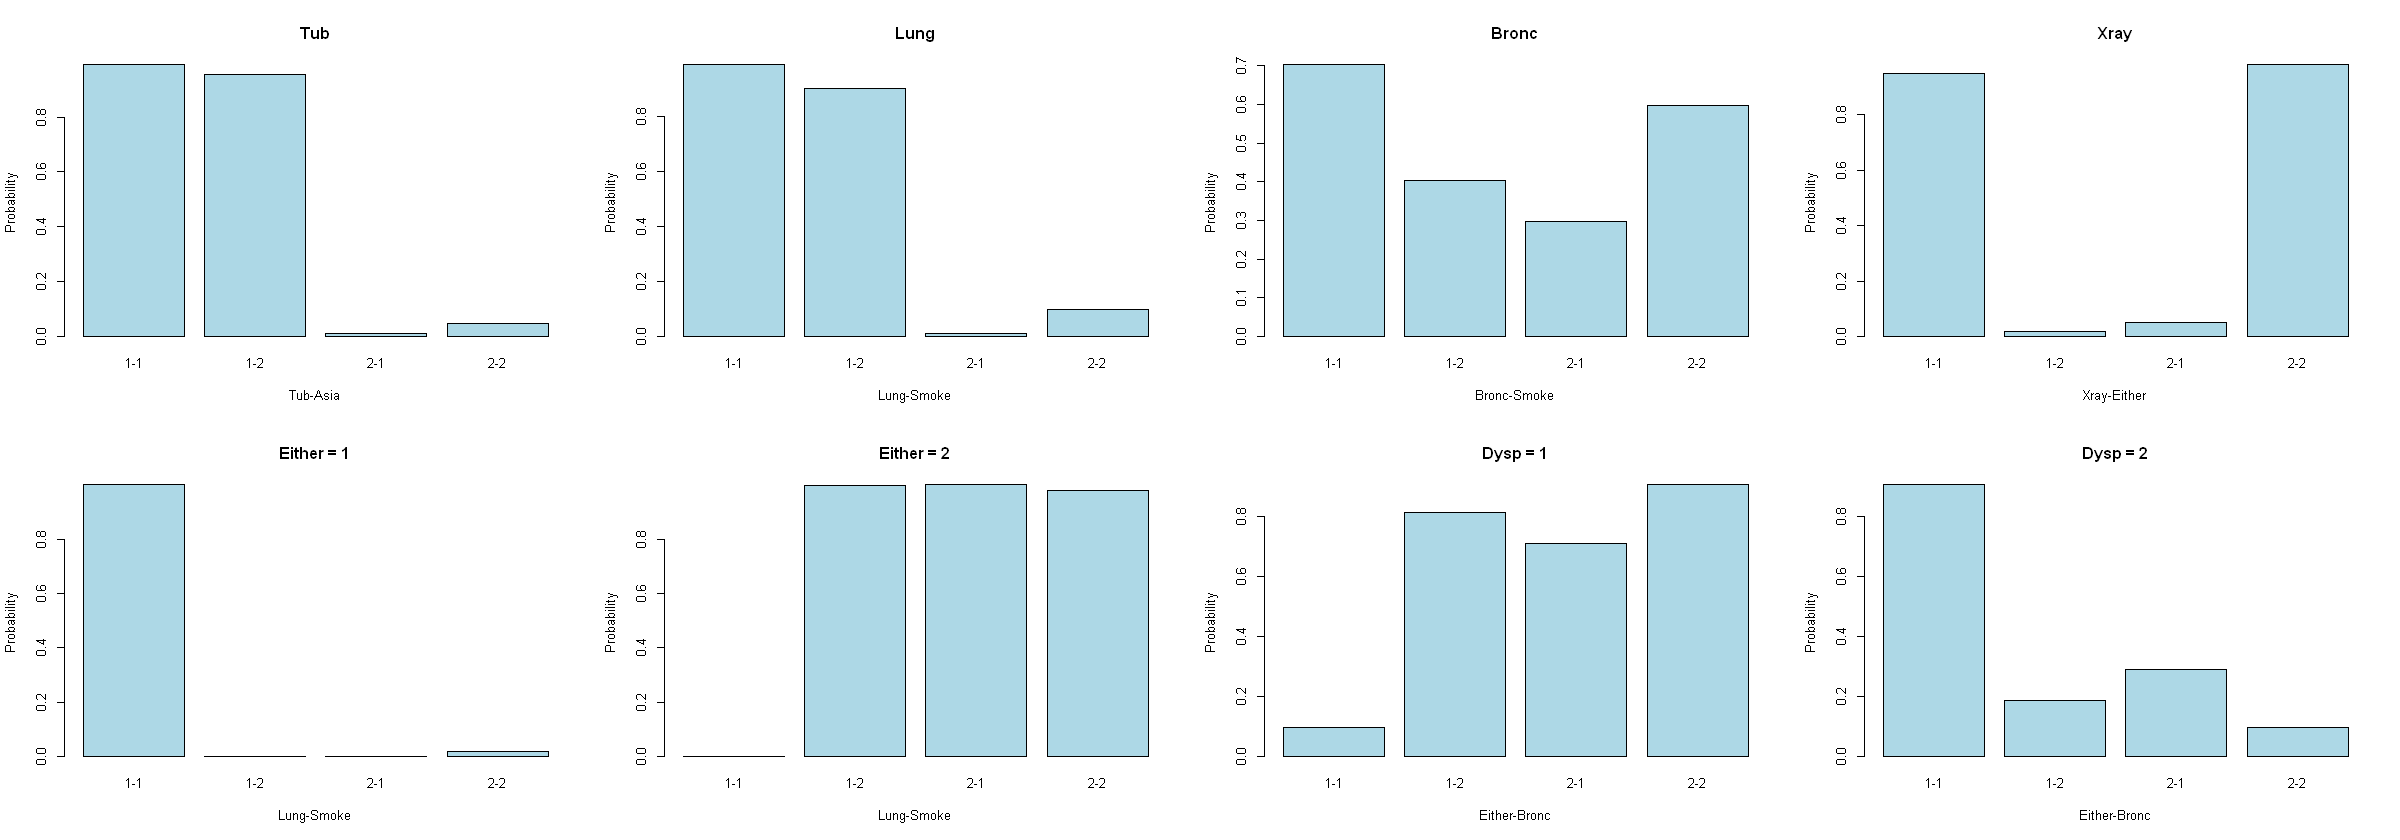

In [16]:

options(repr.plot.width = 20)
par(mfrow=c(2,4))

barplot(net@cpts$tub[0:4], names.arg = c("1-1","1-2","2-1","2-2"), main = 'Tub', xlab = "Tub-Asia", ylab= 'Probability', col='lightblue')
barplot(net@cpts$lung[0:4], names.arg = c("1-1","1-2","2-1","2-2"), main = 'Lung', xlab = "Lung-Smoke", ylab= 'Probability', col='lightblue')
barplot(net@cpts$bronc[0:4], names.arg = c("1-1","1-2","2-1","2-2"), main = 'Bronc', xlab = "Bronc-Smoke", ylab= 'Probability', col='lightblue')
barplot(net@cpts$xray[0:4], names.arg = c("1-1","1-2","2-1","2-2"), main = 'Xray', xlab = "Xray-Either", ylab= 'Probability', col='lightblue')

barplot(net@cpts$either[0:4], names.arg = c("1-1","1-2","2-1","2-2"), main = 'Either = 1', xlab = "Lung-Smoke", ylab= 'Probability', col='lightblue')
barplot(net@cpts$either[5:8], names.arg = c("1-1","1-2","2-1","2-2"), main = 'Either = 2', xlab = "Lung-Smoke", ylab= 'Probability', col='lightblue')

barplot(net@cpts$dysp[0:4], names.arg = c("1-1","1-2","2-1","2-2"), main = 'Dysp = 1', xlab = "Either-Bronc"  , ylab= 'Probability', col='lightblue' )
barplot(net@cpts$dysp[5:8], names.arg = c("1-1","1-2","2-1","2-2"), main = 'Dysp = 2', xlab = "Either-Bronc"  , ylab= 'Probability', col='lightblue' )


#### Child database

In [17]:
# Ordering the variables in order to implement a easier layering 
child <- child |> select(BirthAsphyxia, Disease, Sick, DuctFlow, CardiacMixing, LungParench, LungFlow, LVH, Age, Grunting, HypDistrib, HypoxiaInO2, CO2, ChestXray, LVHreport, GruntingReport, LowerBodyO2, RUQO2, CO2Report, XrayReport)
df.name <- 'CHILD_data'
# Mapping strings to integers, by column

child_num <- child %>% mutate(across(everything(), ~ map_column(.)))

dataset <- BNDataset(data=as.data.frame(child_num), discreteness =  rep(TRUE, length(child_num)), 
                     variables = colnames(child_num), 
                     node.sizes = matrix(apply(child_num, 2, function(x) length(unique(x))))[,1])

### No Pre-defined layering
We left the algorithm search by itself the layering and the structure, imposing no priors on it. The task is quite computationally expensive, since the dataset has 20 variables and 10000 samples.

bnstruct :: learning the structure using SM ...

bnstruct :: learning using SM completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.




Bayesian Network: BNDataset

num.nodes 20

variables
BirthAsphyxia Disease Sick DuctFlow CardiacMixing LungParench LungFlow LVH Age Grunting HypDistrib HypoxiaInO2 CO2 ChestXray LVHreport GruntingReport LowerBodyO2 RUQO2 CO2Report XrayReport
discreteness
TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
node.sizes
2 6 2 3 4 3 3 2 3 2 2 3 3 5 2 2 3 3 2 5
Adjacency matrix:
               BirthAsphyxia Disease Sick DuctFlow CardiacMixing LungParench
BirthAsphyxia              0       0    0        0             0           0
Disease                    1       0    1        1             0           1
Sick                       0       0    0        0             0           0
DuctFlow                   0       0    0        0             0           0
CardiacMixing              0       1    0        0             0           0
LungParench                0       0    0        0             0           0
LungFlow                   0       0

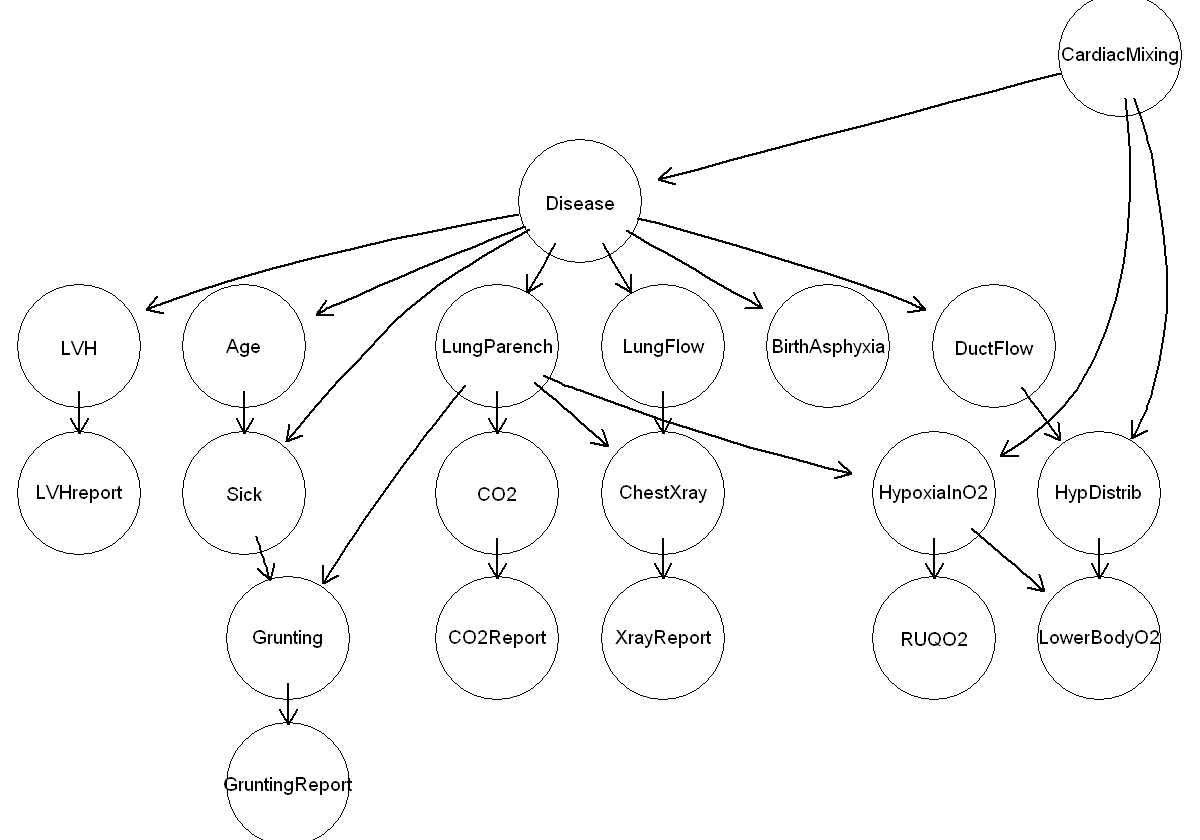

In [18]:
options(repr.plot.width = 10)
net <- learn.network(dataset, algo = "sm",
                      scoring.func = "BDeu",
                      max.parents = 3,
                      struct.threshold = 10,
                      param.threshold = 0.001)
                      
print(net)
plot(net, node.size.lab = 25)

### Pre-defined layering
Starting from a defined DAG and let the algorithm search for the connections we restrinct our problem in terms of computational demand, but at the same time we have to know quite good the dependacies that the variables have between each other: the system needs an expert that prepare the Direct Acyclic Graph structure, al least in a approximatly exact form, to let the algorithm be able to achive the final result correctly and rapidly.

To summarize, the more the dataset increases in variables size, the more the final DAG learned depends on the prior.


bnstruct :: learning the structure using SM ...

bnstruct :: learning using SM completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.




Bayesian Network: BNDataset

num.nodes 20

variables
BirthAsphyxia Disease Sick DuctFlow CardiacMixing LungParench LungFlow LVH Age Grunting HypDistrib HypoxiaInO2 CO2 ChestXray LVHreport GruntingReport LowerBodyO2 RUQO2 CO2Report XrayReport
discreteness
TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
node.sizes
2 6 2 3 4 3 3 2 3 2 2 3 3 5 2 2 3 3 2 5
Adjacency matrix:
               BirthAsphyxia Disease Sick DuctFlow CardiacMixing LungParench
BirthAsphyxia              0       1    0        0             0           0
Disease                    0       0    1        1             1           1
Sick                       0       0    0        0             0           0
DuctFlow                   0       0    0        0             0           0
CardiacMixing              0       0    0        0             0           0
LungParench                0       0    0        0             0           0
LungFlow                   0       0

png 
  2

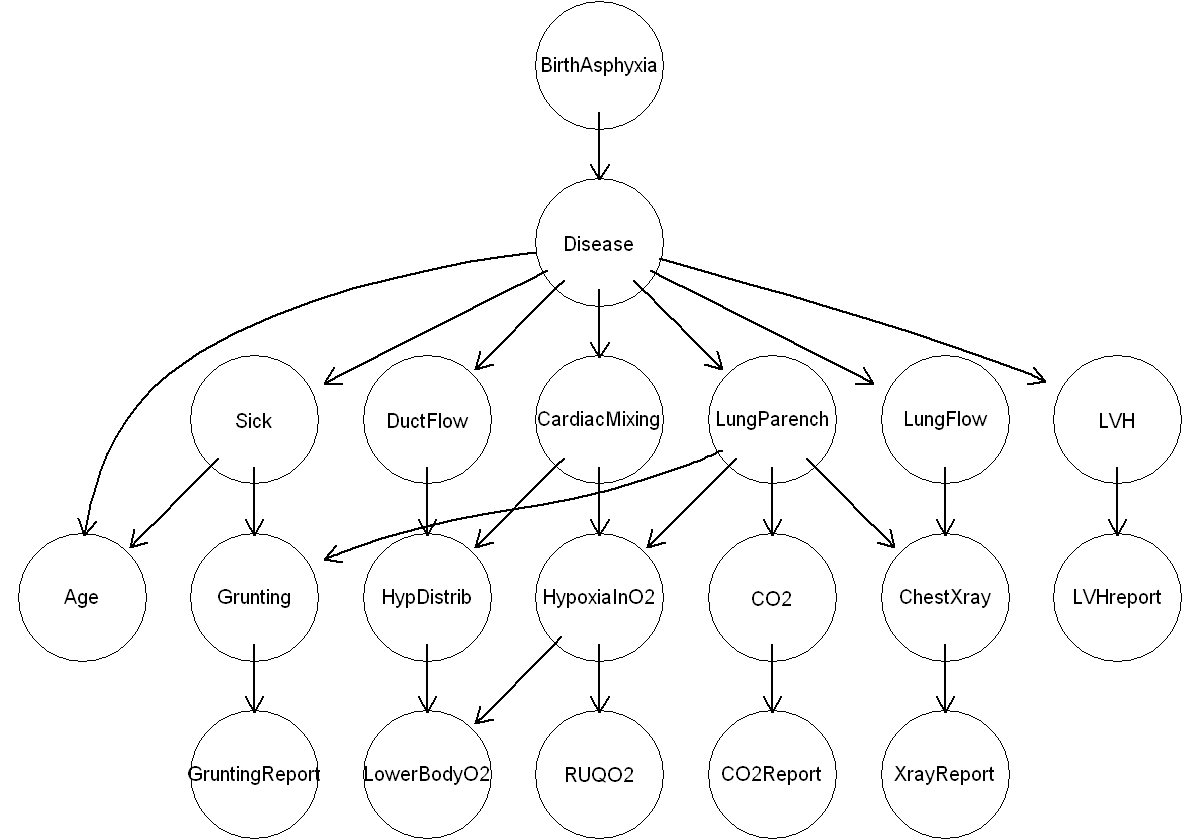

In [19]:
# The numbers represent the layer number to which every respective variables belongs to

layers <- c(1,2,3,3,3,3,3,3,4,4,4,4,4,4,4,5,5,5,5,5)

net <- learn.network(dataset, algo = "sm",
                      scoring.func = "BDeu",
                      max.parents = 3,
                      layering = layers,
                      struct.threshold = 10,
                      param.threshold = 0.001)
print(net)
plot(net, node.size.lab = 25)


#file_name <- paste0('bnlearn_', df.name, '.png')
#output_path <- paste0('bnlearn_images/', file_name)    #choose this ouput_path if creation of dir is needed
#dir.create(file.path('bnlearn_images'))

output_path <- paste0('bnlearn_images/bnlearn_', df.name, '.png')
png(file = output_path, width = 1800, height = 1000)
p <- plot(net, node.size.lab = 45)
par(cex=1)
dev.off()  

<div>
    <img src="bnlearn_images/bnlearn_CHILD.png" alt="Network Image" style="width: 59%; display: inline-block; margin-right: 5px;">
    <img src="true_images/true_CHILD_data.png" alt="bnlearn Image" style="width: 40%; display: inline-block;">
</div>


The final DAG reflects perfectly the original structure of the Child dataset.

### Result comparison

We now present the results from both methods:
- `K2 algorithm`
- `bnlearn package` 

and compare the networks found.

For the next graphs consider:

\begin{array}{c|c}
\textbf{K2 algorithm} & \textbf{Bnlearn package} \\
\end{array}

#### RUIZ

We see that the 2 graphs are equal.

<div>
    <img src="algorithm_images/network_RUIZ.png" alt="Network Image" style="width: 49%; display: inline-block; margin-right: 5px;">
    <img src="bnlearn_images/bnlearn_RUIZ.png" alt="Network Image" style="width: 49%; display: inline-block;">
</div>


#### ASIA

The 2 networks are basically equivalent, except for the parent-child relation *Asia - Tub*. This arc is correctly found only by the 
bnlearn package.

<div>
    <img src="algorithm_images/network_ASIA.png" alt="Network Image" style="width: 49%; display: inline-block; margin-right: 5px;">
    <img src="bnlearn_images/bnlearn_ASIA.png" alt="Network Image" style="width: 49%; display: inline-block;">
</div>


#### Child

The 2 networks are completely equivalent and correctly computed with regards to the 'true' one.

<div>
    <img src="algorithm_images/network_CHILD_data.png" alt="Network Image" style="width: 49%; display: inline-block; margin-right: 5px;">
    <img src="bnlearn_images/bnlearn_CHILD_data.png" alt="Network Image" style="width: 49%; display: inline-block;">
</div>


## Learn with missing data

Not always the data collected are free of errors or missing values: the lack of certain measurements can be caused by many reasons as a malfuctioning of the detecting apparatus or by a digital issue at a processing level. The package 'bnstruct' can any way try to guess the best structure for the Network even in presence of missing data.

Let's begin with Ruiz dataset: we muted an increasing percentage of values per column (from $10$ to $50$%) by replacing the actual value with a 'NA'. We then called the learn.network() function an let it guess the best structure.

bnstruct :: learning the structure using MMHC ...

bnstruct :: learning using MMHC completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.



   x3 x2 x1
1   1 NA  2
2   2  2 NA
3   2  1  1
4  NA  2  2
5   1  1  1
6   2  2  1
7   2 NA NA
8   1  1  1
9  NA  2  2
10  1  1  1


bnstruct :: learning the structure using MMHC ...

bnstruct :: learning using MMHC completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.

bnstruct :: learning the structure using MMHC ...

bnstruct :: learning using MMHC completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.

bnstruct :: learning the structure using MMHC ...

bnstruct :: learning using MMHC completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.

bnstruct :: learning the structure using MMHC ...

bnstruct :: learning using MMHC completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.



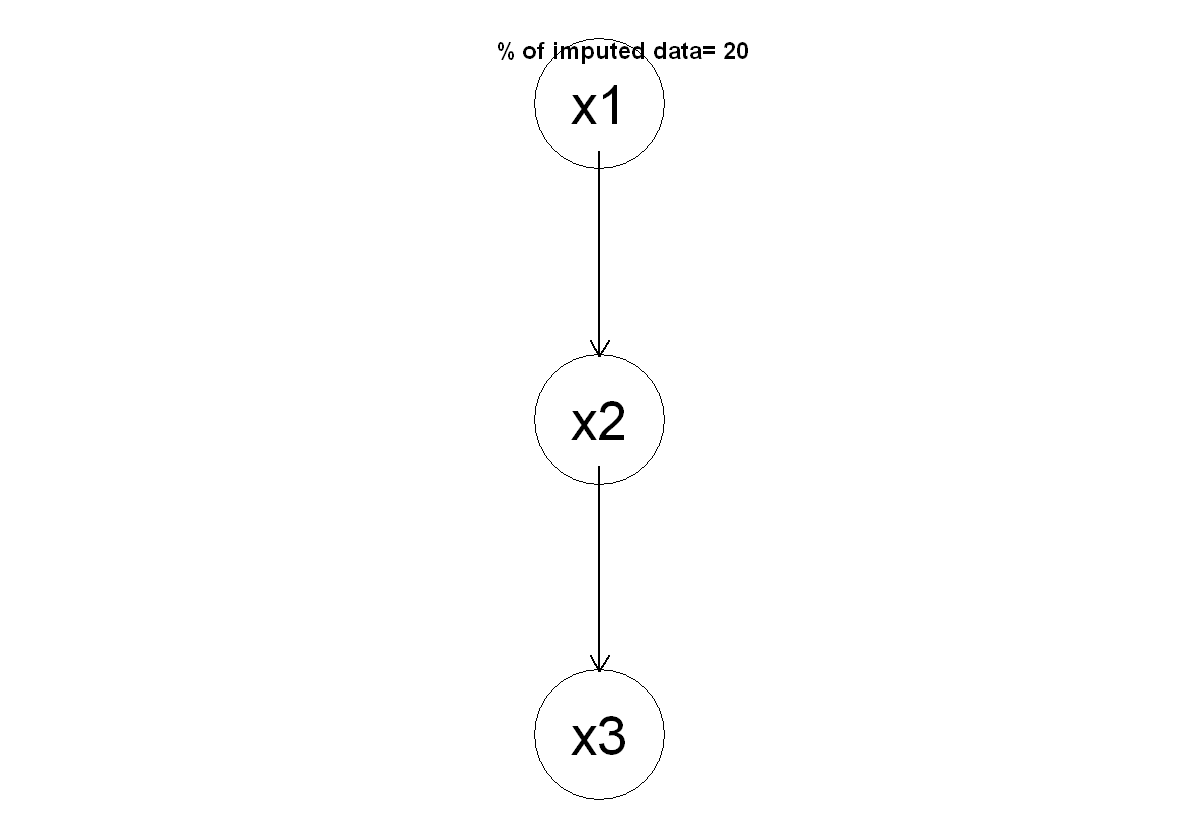

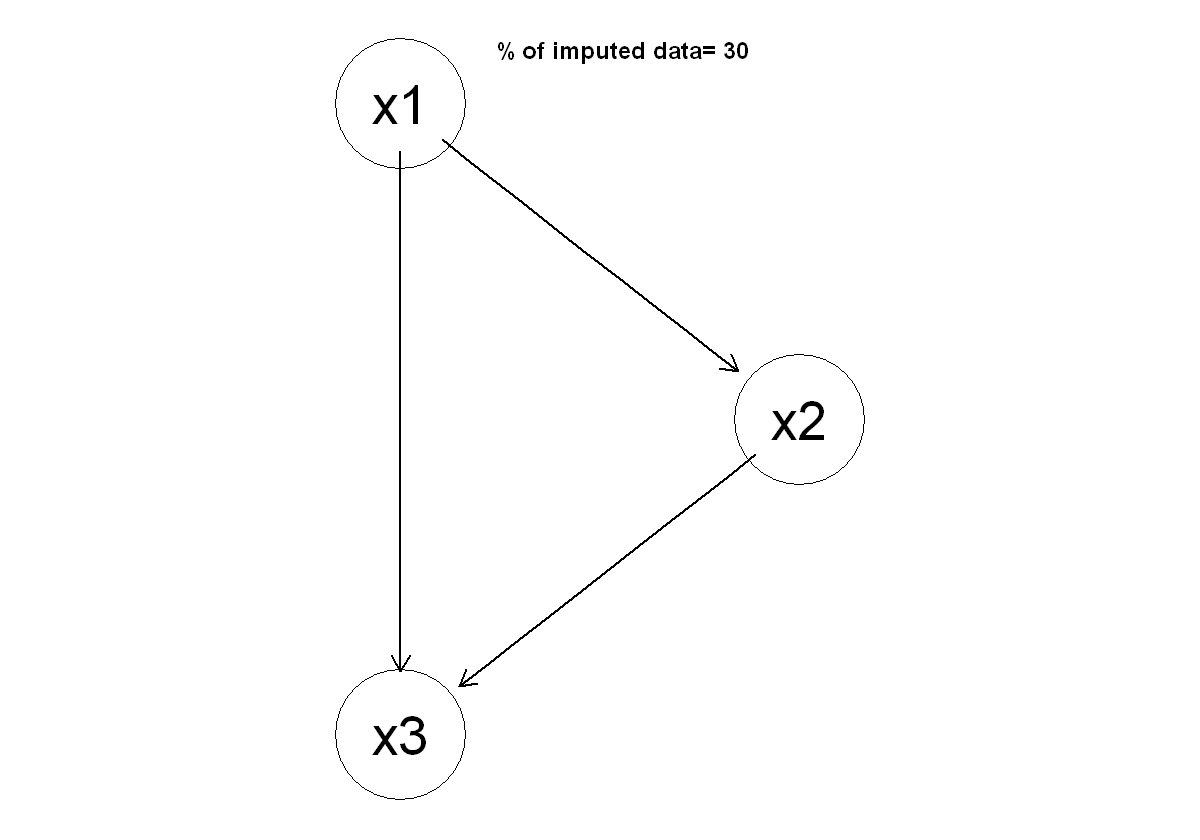

In [20]:
dataset <- BNDataset(data = ruiz, variables = names(ruiz), discreteness = rep(TRUE,length(names(ruiz))), node.sizes = matrix(apply(ruiz, 2, function(x) length(unique(x))))[,1] )
options(bnstruct.verbose = FALSE)

layers <- c(3,2,1)

for (i in seq(10,50,10)){
      ruiz_na <- as.data.frame(apply (ruiz, 2, function(x) {x[sample( c(1:dim(ruiz)[1]), floor(0.01*i*dim(ruiz)[1]))] <- NA ; x}      ))
      
      if (i==20){
        print(ruiz_na)
      }
      
      dataset_na <- BNDataset(data = ruiz_na, variables = names(ruiz_na), discreteness = rep (TRUE,length(names(ruiz_na))), node.sizes = matrix(apply(ruiz_na, 2, function(x) length(unique(x ))))[,1]-1 )
    
      net2 <- learn.network(dataset_na, use.impute.data =TRUE, layering = layers)
    
      if (i == 20 | i== 30){
      plot(net2,node.size.lab = 10, node.size=2)
      title(main=paste('% of imputed data=',i ))
      }
}

We can see that till 20% of missing data, the algorithm is still able to find the original structure, given a node layering. From 30% to 50% the present links are 4, with 3 correct choices and an incorrect parent-son relation between X1 and X3, which can be born by spurious correlations on the restrict part of the dataset.

With the aim of testing the algorithm on a much bigger dataset, we swiched our analysis on the Asia Dataset.

### Asia Dataset

bnstruct :: learning the structure using SM ...

bnstruct :: learning using SM completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.



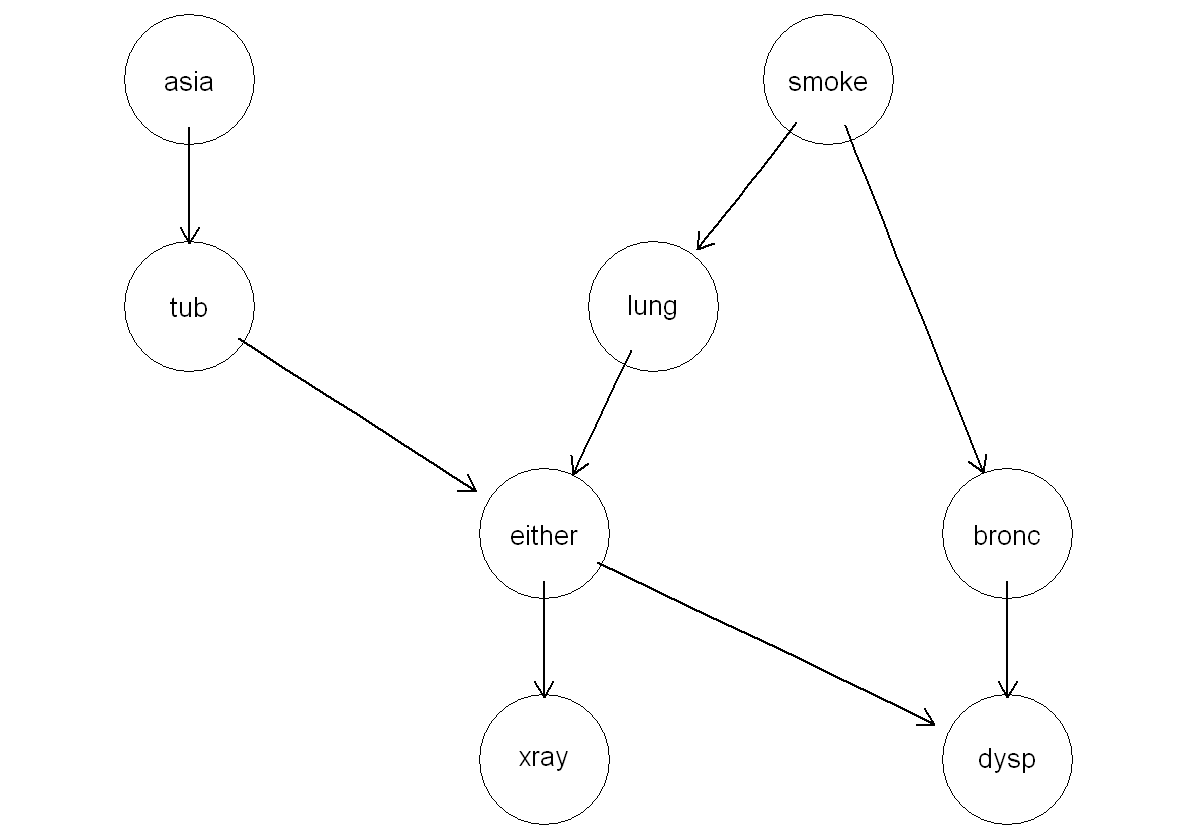

In [21]:
library(bnlearn)

dataset <- BNDataset(data=as.data.frame(asia_num), discreteness =  rep(TRUE, length(asia_num)), 
                     variables = colnames(asia_num), 
                     node.size = matrix(apply(asia_num, 2, function(x) length(unique(x))))[,1])

net1 <- learn.network(dataset, algo = "sm",
                      scoring.func = "BDeu",
                      struct.threshold = 10,
                      param.threshold = 0.001)

plot(net1, node.size.lab = 15)

This is the original and correct structure underneath the Asia Dataset

bnstruct :: learning the structure using SM ...

bnstruct :: learning using SM completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.

bnstruct :: learning the structure using SM ...

bnstruct :: learning using SM completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.

bnstruct :: learning the structure using SM ...

bnstruct :: learning using SM completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.

bnstruct :: learning the structure using SM ...

bnstruct :: learning using SM completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.

bnstruct :: learning the structure using SM ...

bnstruct :: learning using SM completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.

bnstruct :: learning the structure using SM ...

bnstruct :: learning using SM completed.

bnstruct :: learning network param

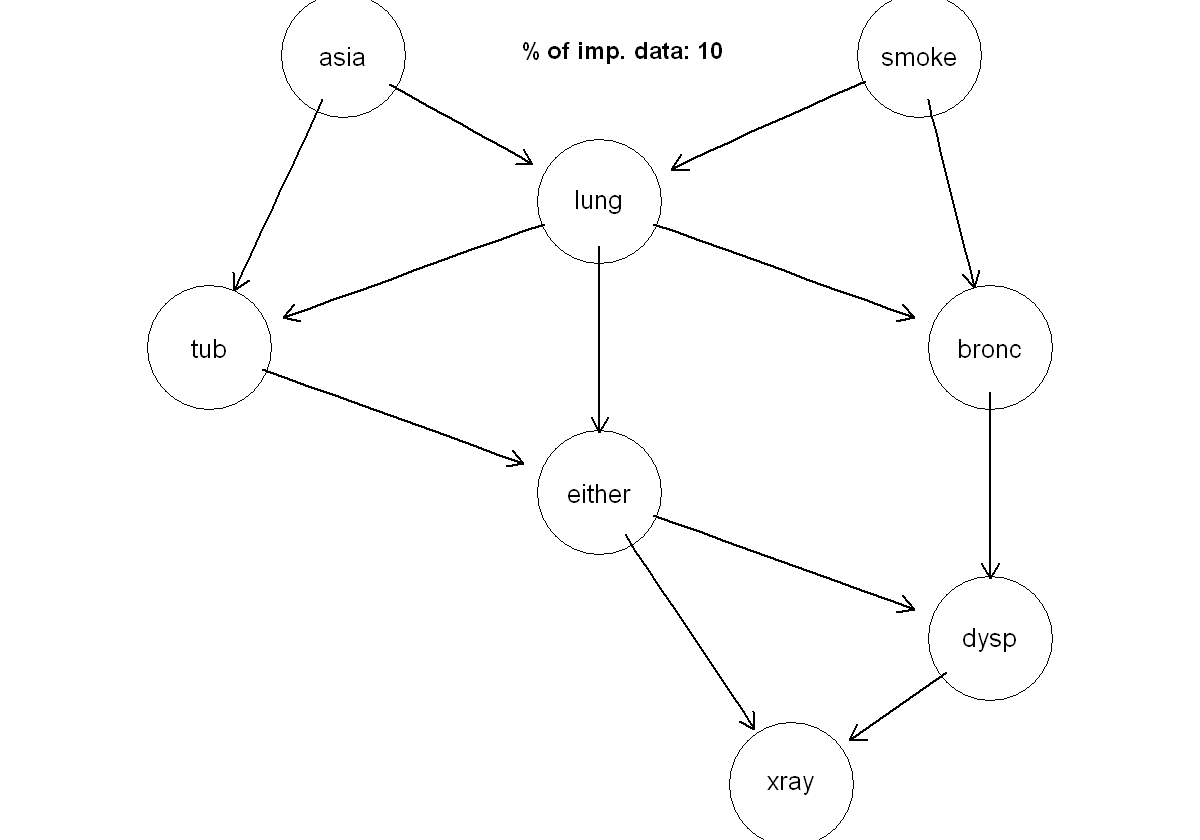

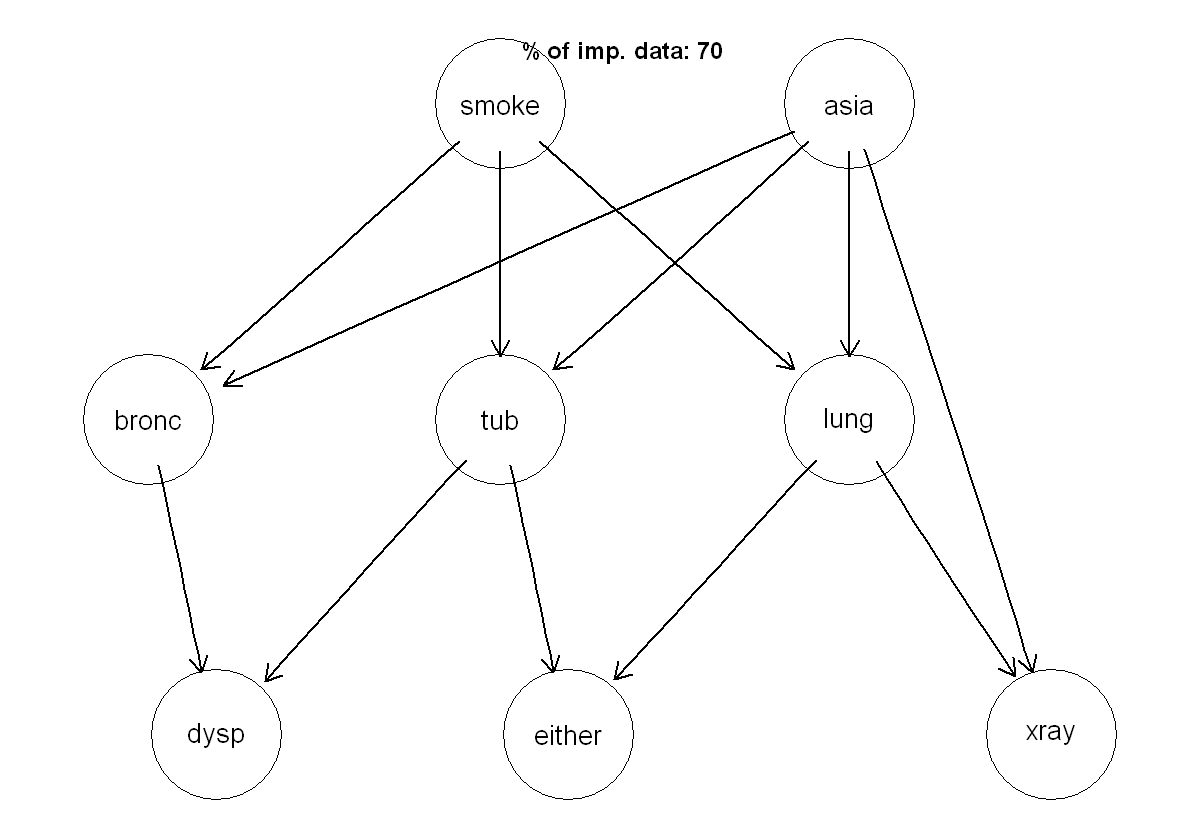

  % imputed data % error tot edges % lack tot egdes orig
1             10    33.3        12    0.0              8
2             20    33.3        12    0.0              8
3             30    41.7        12   12.5              8
4             40    41.7        12   12.5              8
5             50    33.3        12    0.0              8
6             60    41.7        12   12.5              8
7             70    50.0        12   25.0              8


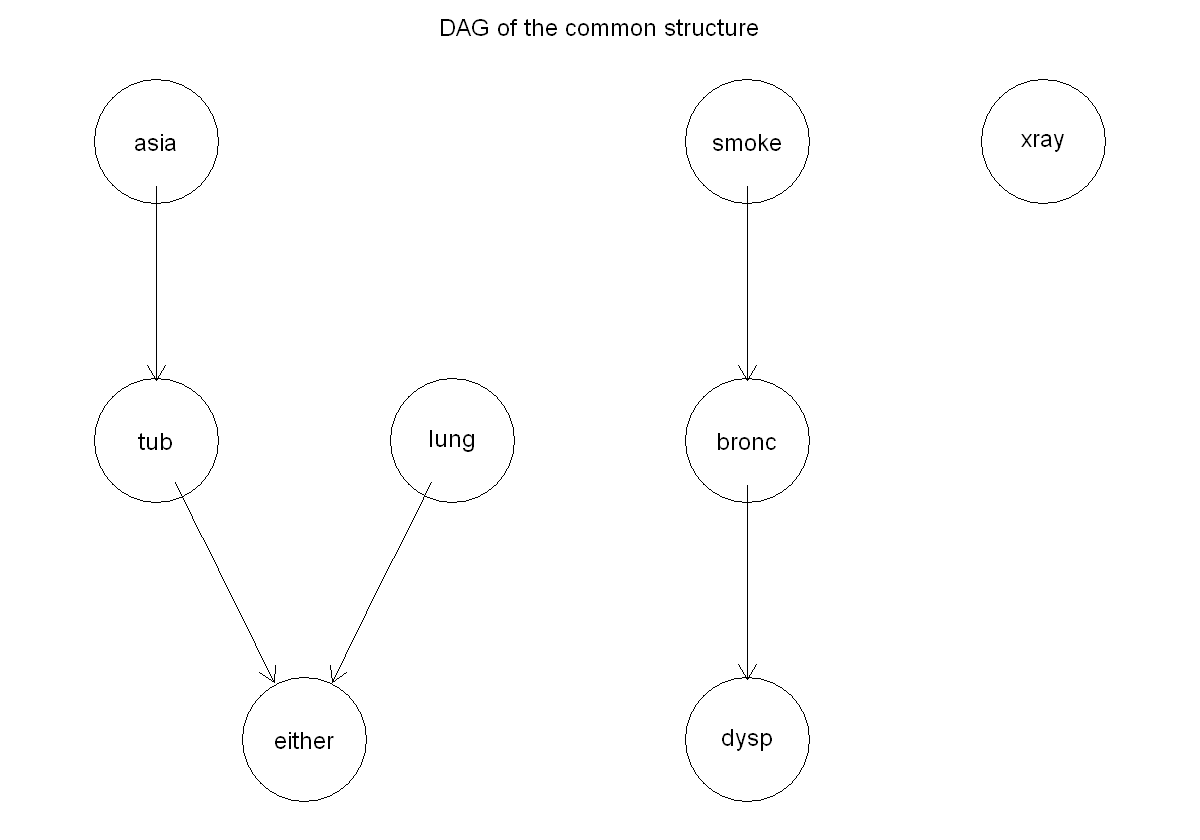

In [22]:

dataset <- BNDataset(data=as.data.frame(asia_num), discreteness =  rep(TRUE, length(asia_num)),variables = colnames(asia_num), 
                     node.size = matrix(apply(asia_num, 2, function(x) length(unique(x))))[,1])

# Empty dataframe to be filled
asia_res <- data.frame()

# Adding the layering 
layers <- c(1,2,1,2,3,3,4,4)

# Empty matrix to be filled 
tot_net <- matrix(data = rep(0,length(colnames(asia_num))^2), nrow = 8, byrow = TRUE)

for (i in seq(10,70,10)){
      # Adding NA at random in every column with a certain percentage 
      asia_na <- as.data.frame(apply (asia_num, 2, function(x) {x[sample( c(1:dim(asia_num)[1]), floor(0.01*i*dim(asia_num)[1]))] <- NA ; x}      ))
      
      # Constructing our new BNDataset
      dataset_na <- BNDataset(data = asia_na, variables = names(asia_na), discreteness = rep         (TRUE     ,length(names(asia_na))), node.sizes = matrix(apply(asia_na, 2, function(x)          length(unique(x     ))))[,1]-1 )
      
      # Learning the structure
      net <- learn.network(dataset_na,algo = "sm",
                           scoring.func = "BDeu",
                           struct.threshold = 10,
                           param.threshold = 0.001,
                           max.parents = 2,
                           layering =layers
                           )
      
      # Matrix of the differences between the adj matrix
      diff_mat  <- net1@dag - net@dag
      
      # Counting the number of error and lacks
      err_edges <- sum(abs(diff_mat[diff_mat==-1]))/length(net@dag[net@dag==1])
      lack_edges <- sum(sum(diff_mat[diff_mat==1])/length(net1@dag[net1@dag==1]))
      
      tot_edges <- length(net@dag[net@dag==1])
      tot_edges1 <- length(net1@dag[net1@dag==1])
      
      # Constructing the average adj matrix of the entire process
      tot_net <- tot_net+net@dag/7

      # Build the result dataframe
      asia_res <- rbind(asia_res, c(i,round(err_edges,3)*100,tot_edges,round(lack_edges,3)*100,tot_edges1))
      
      if (i == 10 | i == 70){
          plot(net,  node.size.lab = 15, node.size=2)
          title(main=paste('% of imp. data:', i), cex.main = 1.2, cex.axis = 0.8, cex.lab = 0.8)
      }    
}

colnames(asia_res) <- c('% imputed data','% error','tot edges','% lack','tot egdes orig')

# Filter avg adj matrix on links always present
x <- which(tot_net>0.95) 

# Constructing the new matrix to plot the robust structure
xx <- ifelse(1:length(colnames(asia_num))^2 %in% x, 1, 0)
mat_max <- matrix(xx, nrow = 8, byrow = FALSE)
network_ <- empty.graph(colnames(asia_num))
amat(network_) <- mat_max

# Plot it
graphviz.plot(network_, layout = 'dot', main =  "DAG of the common structure")

print(asia_res)


The common links to all the resulting networks are all links that are also present in the original network structure of the Asia dataset. In the latter there are 3 nore links conncting Smoke to Lung, Either to Dysp and Either to Xray, so we basically found 5 correct links out of 8, with datasets that have many missing value. 

The next step could be to 'impute' the data, i.e. filling the NAs with values given by the Bayesian Network found through the operation made above, and check the quality of the results. 